**Leemos las imágenes del corpus olivetti**

In [1]:
from sklearn.datasets import fetch_olivetti_faces
orl = fetch_olivetti_faces()
X = orl.data
y = orl.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


**Descomposición en valores singulares (SVD)**

In [2]:
import numpy as np
m = np.mean(X, axis=0)
X = X - m
U, S, Vt = np.linalg.svd(X)

**Reconstrucción de imágenes generadas aleatoriamente con QDA y proyección con SVD**

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

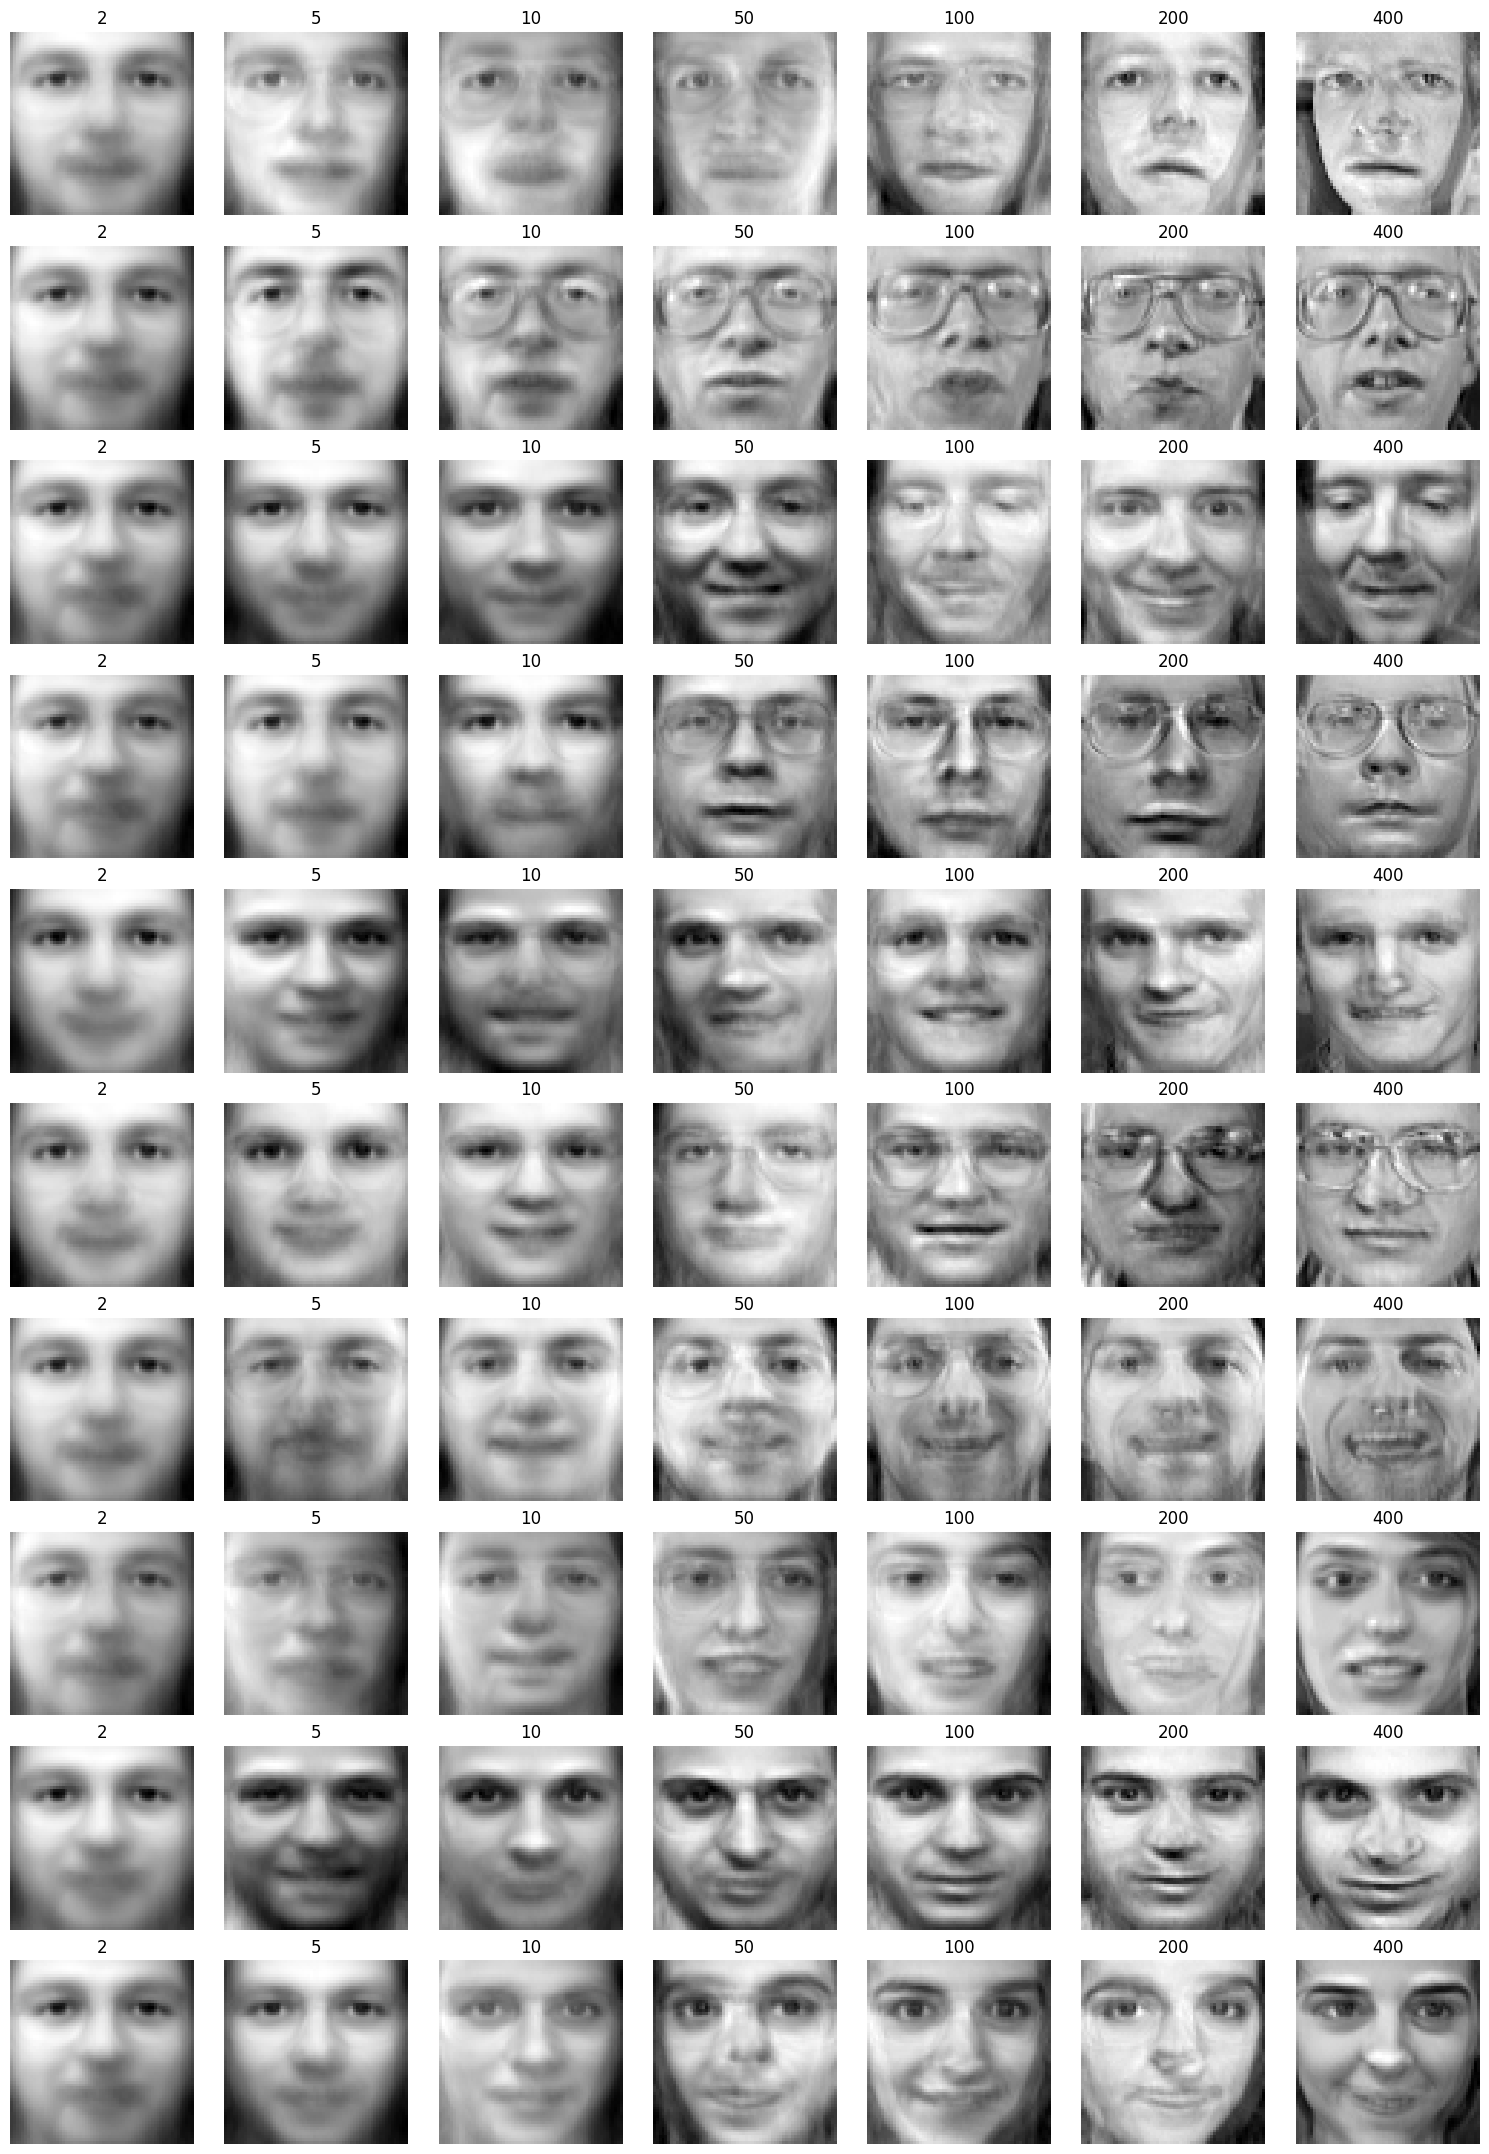

In [3]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
nrows, ncols = 10, 7
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15*nrows/ncols), constrained_layout=True)
K = [2, 5, 10, 50, 100, 200, U.shape[0]]
c=0
for p in np.arange(0, 10):
 for k in K:
    Xw = U[:, 0:k] * S[0:k]
    clf = QuadraticDiscriminantAnalysis(store_covariance=True).fit(Xw, y)
    random_face=np.random.multivariate_normal(clf.means_[p], clf.covariance_[p], size=None, check_valid='ignore', tol=1e-8)
    Xr = random_face @ Vt[0:k,:] + m
    ax = axes.flat[c]
    ax.set_axis_off()
    ax.imshow(Xr.reshape(64,64), cmap=plt.cm.gray, interpolation="none")
    ax.set_title("{:}".format(k))
    c=c+1